In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd

# Function to process a single image
def process_image(image_path):
    # Load the image
    image = cv2.imread(image_path)
    # Convert to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply adaptive thresholding
    adaptive_thresh = cv2.adaptiveThreshold(gray, 255, 
                                            cv2.ADAPTIVE_THRESH_GAUSSIAN_C, 
                                            cv2.THRESH_BINARY_INV, 
                                            11, 2)

    # Find contours
    contours, _ = cv2.findContours(adaptive_thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Calculate areas of all contours
    areas = [cv2.contourArea(contour) for contour in contours]

    return image, areas, contours



In [13]:
# Directory containing images
input_dir = '/Users/pallavisingh/Library/CloudStorage/OneDrive-SharedLibraries-DalhousieUniversity/Priyadharshini Sridharan - Images from Dellaire Lab/merged_pml_images_High_Arsenic'  # Update this path
output_dir = '/Users/pallavisingh/Library/CloudStorage/OneDrive-SharedLibraries-DalhousieUniversity/Priyadharshini Sridharan - Images from Dellaire Lab/Segmented_PML_bodies_high_arsenic'  # Update this path
os.makedirs(output_dir, exist_ok=True)  # Create output directory if it doesn't exist

# Data collection for Excel
data = []



In [10]:
# Process each image in the input directory
for filename in os.listdir(input_dir):
    if filename.endswith('.tif'):  # Process only .tif files
        image_path = os.path.join(input_dir, filename)
        
        # Process the image and get areas and contours
        image, areas, contours = process_image(image_path)

        # Determine min and max area dynamically
        if min(areas) == 0:
            min_area = 0.5 
        else:
            min_area = min(areas)
        max_area = max(areas) if areas else 0

        # Filter contours based on the dynamically determined area thresholds
        valid_contours = [c for c in contours if min_area < cv2.contourArea(c) < max_area]

        # Draw valid contours on the image
        result_image = image.copy()
        cv2.drawContours(result_image, valid_contours, -1, (0, 255, 0), 2)

        # Save the resulting image to the output directory
        output_image_path = os.path.join(output_dir, os.path.basename(image_path))
        cv2.imwrite(output_image_path, result_image)

        # Collect data for the Excel file
        data.append({
            'Image Name': filename,
            'Min Contour Area': min_area,
            'Max Contour Area': max_area,
            'Count of PML Bodies': len(valid_contours)
        })

        # Print minimum and maximum area values for inspection
        print(f"Image: {filename}")
        print(f"Min contour area: {min_area}")
        print(f"Max contour area: {max_area}")
        print(f"Sorted contour areas: {sorted(areas)}")

# Create a DataFrame and save it as an Excel file
df = pd.DataFrame(data)
excel_file_path = './data/pml_bodies_summary_high.xlsx'  # Update this path
df.to_excel(excel_file_path, index=False)

print(f'Summary saved to {excel_file_path}')


Image: flattened_position_10_C1.tif
Min contour area: 0.5
Max contour area: 162.5
Sorted contour areas: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 2.0, 2.0, 2.0, 2.5, 3.0, 3.0, 5.0, 16.0, 32.5, 35.0, 35.0, 37.5, 37.5, 39.0, 39.0, 40.0, 47.5, 48.5, 54.5, 56.0, 57.0, 57.5, 58.5, 59.0, 62.0, 66.5, 71.5, 73.5, 81.0, 92.5, 98.0, 101.0, 104.5, 115.0, 131.5, 133.0, 162.5]
Image: flattened_position_6_C1.tif
Min contour area: 0.5
Max contour area: 244.0
Sorted contour areas: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 

Image: flattened_position_28_C1.tif
Min contour area: 0.5
Max contour area: 306.0
Sorted contour areas: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 1.0, 1.0, 1.5, 1.5, 1.5, 1.5, 2.0, 2.0, 2.0, 2.5, 2.5, 2.5, 2.5, 3.5, 3.5, 11.5, 11.5, 12.0, 15.0, 15.5, 24.0, 35.0, 35.5, 37.0, 50.0, 54.0, 54.5, 69.5, 70.0, 73.5, 74.0, 80.5, 94.5, 97.0, 100.0, 107.0, 122.0, 124.0, 136.5, 165.5, 167.5, 188.0, 203.0, 232.5, 306.0]
Image: flattened_position_36_C1.tif
Min contour area: 0.5
Max contour area: 225.5
Sorted contour areas: [0.0, 0.0, 0.0,

Image: flattened_position_35_C1.tif
Min contour area: 0.5
Max contour area: 350.0
Sorted contour areas: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 1.0, 1.0, 1.0, 1.0, 1.0, 1.5, 1.5, 1.5, 1.5, 2.0, 2.0, 2.5, 3.5, 4.5, 4.5, 7.0, 10.0, 13.0, 15.5, 15.5, 16.5, 45.0, 45.5, 47.5, 65.5, 71.5, 72.5, 77.0, 81.5, 82.0, 84.0, 107.5, 107.5, 142.5, 168.0, 282.0, 312.5, 350.0]
Image: flattened_position_39_C1.tif
Min contour area: 0.5
Max contour area: 249.5
Sorted contour areas: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.5, 0.5, 1.0, 1.0, 1.5, 1.5, 1.5, 2.0, 2.5, 2.5, 5.5, 6.0, 9.0, 31.5, 36.0, 38.5, 44.0, 55.5, 5

Image: flattened_position_13_C1.tif
Min contour area: 0.5
Max contour area: 646.0
Sorted contour areas: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 1.0, 1.0, 1.0, 1.5, 2.0, 2.0, 2.0, 2.0, 4.0, 4.0, 4.5, 6.0, 6.5, 13.0, 15.5, 26.0, 32.5, 34.5, 39.0, 41.0, 44.0, 48.5, 58.5, 59.0, 62.5, 64.5, 68.0, 72.5, 79.0, 82.0, 97.0, 106.5, 108.0, 118.5, 120.0, 196.0, 229.5, 646.0]
Image: flattened_position_17_C1.tif
Min contour area: 0.5
Max contour area: 289.5
Sorted contour areas: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0

Image: flattened_position_40_C1.tif
Min contour area: 0.5
Max contour area: 232.5
Sorted contour areas: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 1.0, 1.0, 1.0, 1.0, 1.5, 1.5, 1.5, 1.5, 1.5, 2.0, 2.0, 2.5, 2.5, 2.5, 3.0, 3.0, 3.0, 3.5, 4.0, 5.0, 7.5, 8.5, 10.0, 10.0, 11.0, 13.5, 15.0, 17.0, 18.0, 23.0, 33.0, 36.5, 37.0, 37.0, 39.0, 43.0, 44.0, 44.5, 46.0, 49.0, 53.0, 56.0, 56.5, 59.0, 66.0, 78.0, 78.0, 79.5, 86.5, 97.5, 98.0, 104.0, 116.0, 121.5, 123.0, 125.5, 142.0, 162.5, 169.5, 187.0, 215.0, 232.5]
Image: flattened_position_23_C1.tif
Min contour area: 0.5
M

In [16]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
from scipy import ndimage
from skimage.feature import peak_local_max

def preprocess_image(image):
    """
    Preprocess the image to enhance PML body detection
    """
    # Convert to grayscale if needed
    if len(image.shape) == 3:
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    else:
        gray = image.copy()
    
    # Apply Gaussian blur to reduce noise
    blurred = cv2.GaussianBlur(gray, (3, 3), 0)
    
    # Enhance contrast using CLAHE
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    enhanced = clahe.apply(blurred)
    
    return enhanced

def detect_pml_bodies(image, min_distance=5, threshold_abs=10, min_area=20, max_area=1000):
    """
    Detect PML bodies using a combination of local maxima detection and intensity analysis
    """
    # Preprocess the image
    preprocessed = preprocess_image(image)
    
    # Find local maxima
    coordinates = peak_local_max(preprocessed, 
                               min_distance=min_distance,
                               threshold_abs=threshold_abs)
    
    # Create a mask of local maxima
    mask = np.zeros_like(preprocessed, dtype=bool)
    mask[tuple(coordinates.T)] = True
    
    # Label connected components
    labels, num_features = ndimage.label(mask)
    
    # Initialize list to store valid PML bodies
    valid_contours = []
    areas = []
    
    # Process each potential PML body
    for label in range(1, num_features + 1):
        # Get the region around this local maximum
        region = preprocessed * (labels == label)
        if np.any(region):
            # Threshold the region
            _, thresh = cv2.threshold(region.astype(np.uint8), 
                                   0, 255, 
                                   cv2.THRESH_BINARY + cv2.THRESH_OTSU)
            
            # Find contours in the thresholded region
            contours, _ = cv2.findContours(thresh, 
                                         cv2.RETR_EXTERNAL, 
                                         cv2.CHAIN_APPROX_SIMPLE)
            
            for contour in contours:
                area = cv2.contourArea(contour)
                if min_area <= area <= max_area:
                    valid_contours.append(contour)
                    areas.append(area)
    
    return valid_contours, areas

def process_image(image_path, output_path=None):
    """
    Process a single image and optionally save the result
    """
    # Load the image
    image = cv2.imread(image_path)
    if image is None:
        raise ValueError(f"Could not load image: {image_path}")
    
    # Detect PML bodies
    valid_contours, areas = detect_pml_bodies(image)
    
    # Create result image
    result_image = image.copy()
    cv2.drawContours(result_image, valid_contours, -1, (0, 255, 0), 2)
    
    # Calculate statistics
    stats = {
        'Image Name': os.path.basename(image_path),
        'Min Contour Area': min(areas) if areas else 0,
        'Max Contour Area': max(areas) if areas else 0,
        'Count of PML Bodies': len(valid_contours),
        'Mean Area': np.mean(areas) if areas else 0,
        'Std Area': np.std(areas) if areas else 0
    }
    
    # Save the result if output path is provided
    if output_path:
        cv2.imwrite(output_path, result_image)
    
    return result_image, stats, valid_contours

def process_directory(input_dir, output_dir):
    """
    Process all images in a directory
    """
    # Create output directory if it doesn't exist
    os.makedirs(output_dir, exist_ok=True)
    
    # Initialize list to store data for Excel
    data = []
    
    # Process each image
    for filename in os.listdir(input_dir):
        if filename.endswith(('.tif', '.jpg', '.png')):
            input_path = os.path.join(input_dir, filename)
            output_path = os.path.join(output_dir, filename)
            
            try:
                _, stats, _ = process_image(input_path, output_path)
                data.append(stats)
                print(f"Processed: {filename}")
                
            except Exception as e:
                print(f"Error processing {filename}: {str(e)}")
    
    # Create and save summary DataFrame
    df = pd.DataFrame(data)
#     excel_path = os.path.join(output_dir, 'pml_bodies_summary.xlsx')
    df.to_excel('./data/pml_bodies_summary.xlsx', index=False)
    
    return df

# Example usage
if __name__ == "__main__":
    input_dir = input_dir
    output_dir = output_dir
    summary_df = process_directory(input_dir, output_dir)

Processed: flattened_position_10_C1.tif
Processed: flattened_position_6_C1.tif
Processed: flattened_position_34_C1.tif
Processed: flattened_position_26_C1.tif
Processed: flattened_position_38_C1.tif
Processed: flattened_position_4_C1.tif
Processed: flattened_position_8_C1.tif
Processed: flattened_position_12_C1.tif
Processed: flattened_position_24_C1.tif
Processed: flattened_position_28_C1.tif
Processed: flattened_position_36_C1.tif
Processed: flattened_position_32_C1.tif
Processed: flattened_position_20_C1.tif
Processed: flattened_position_16_C1.tif
Processed: flattened_position_22_C1.tif
Processed: flattened_position_30_C1.tif
Processed: flattened_position_2_C1.tif
Processed: flattened_position_18_C1.tif
Processed: flattened_position_14_C1.tif
Processed: flattened_position_35_C1.tif
Processed: flattened_position_39_C1.tif
Processed: flattened_position_27_C1.tif
Processed: flattened_position_11_C1.tif
Processed: flattened_position_7_C1.tif
Processed: flattened_position_25_C1.tif
Proce

In [8]:

# Load your grayscale image
image_path = '/Users/pallavisingh/Downloads/image (7).jpeg'


In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('/Users/pallavisingh/Downloads/image (7).jpeg')

# Convert the image from BGR to RGB for displaying in Matplotlib
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Convert image to HSV color space
hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)




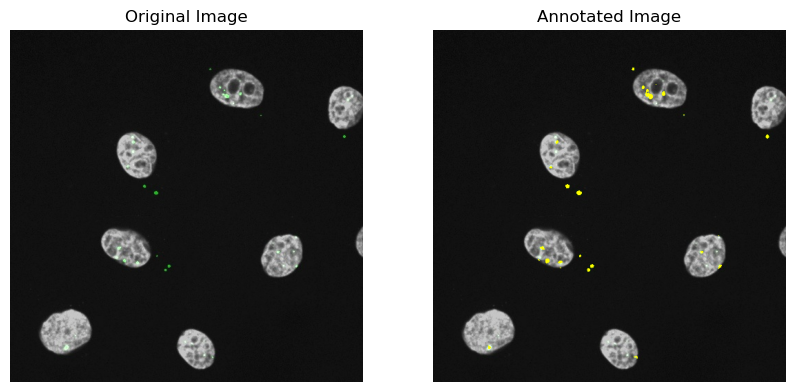

In [6]:
# Define range for green color in HSV
lower_green = np.array([40, 40, 40])   # Lower bound of green
upper_green = np.array([80, 255, 255]) # Upper bound of green


# Create a mask for red pixels
red_mask = cv2.inRange(hsv_image, lower_green, upper_green)

# Annotate the red pixels in the original image
annotated_image = image_rgb.copy()
annotated_image[red_mask > 0] = [255, 255, 0]  # Change red pixels to yellow for annotation

# Display the original and annotated images
plt.figure(figsize=(10, 5))

# Show the original image
plt.subplot(1, 2, 1)
plt.imshow(image_rgb)
plt.title("Original Image")
plt.axis("off")

# Show the annotated image
plt.subplot(1, 2, 2)
plt.imshow(annotated_image)
plt.title("Annotated Image")
plt.axis("off")

plt.show()

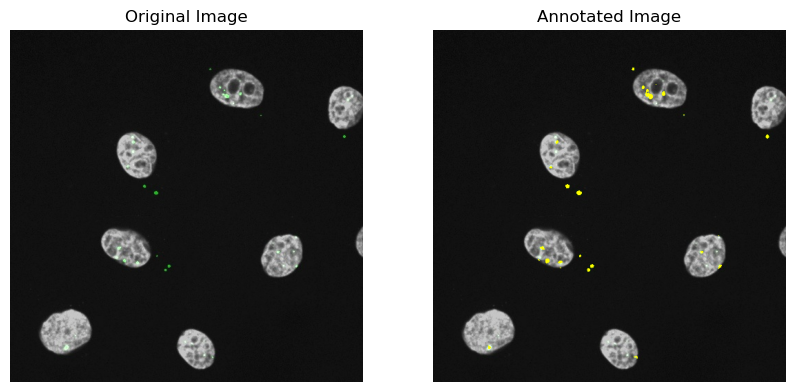

Total number of green pixels: 459


In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# # Load the image
# image_path = image
image_bgr = cv2.imread(image_path)

# Convert the image from BGR to RGB
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)

# Convert the image to HSV color space
hsv_image = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2HSV)

# Define range for green color in HSV
lower_green = np.array([40, 40, 40])   # Lower bound of green
upper_green = np.array([80, 255, 255]) # Upper bound of green

# Create a mask for green pixels
green_mask = cv2.inRange(hsv_image, lower_green, upper_green)

# Count the number of green pixels
green_pixel_count = cv2.countNonZero(green_mask)

# Annotate the green pixels in the original image
annotated_image = image_rgb.copy()
annotated_image[green_mask > 0] = [255, 255, 0]  # Change green pixels to yellow for annotation

# Display the original and annotated images
plt.figure(figsize=(10, 5))

# Show the original image
plt.subplot(1, 2, 1)
plt.imshow(image_rgb)
plt.title("Original Image")
plt.axis("off")

# Show the annotated image
plt.subplot(1, 2, 2)
plt.imshow(annotated_image)
plt.title("Annotated Image")
plt.axis("off")

plt.show()

# Print the total count of green pixels
print("Total number of green pixels:", green_pixel_count)


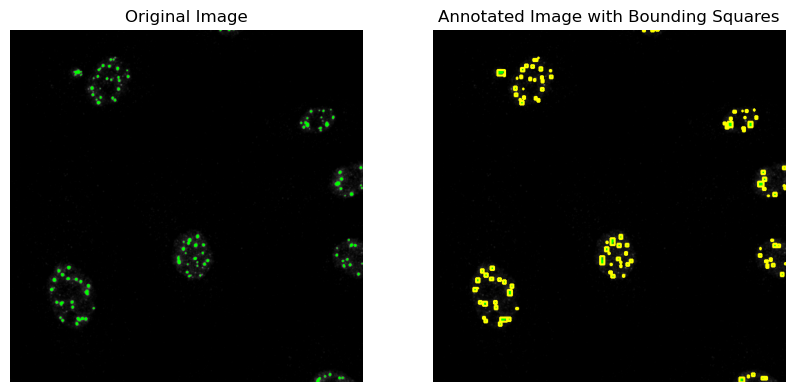

Total number of green pixels: 1357
Total number of detected dots (contours): 106


In [29]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image (ensure it's in RGB format)
image_rgb = cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB)

# Convert to HSV color space
hsv_image = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2HSV)

# Define range for green color in HSV
lower_green = np.array([40, 40, 40])   # Lower bound of green
upper_green = np.array([80, 255, 255]) # Upper bound of green

# Create a mask for green pixels
green_mask = cv2.inRange(hsv_image, lower_green, upper_green)

# Find contours of the green regions
contours, _ = cv2.findContours(green_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Annotate the green pixels in the original image
annotated_image = image_rgb.copy()

# Draw bounding squares around each detected contour
for contour in contours:
    x, y, w, h = cv2.boundingRect(contour)  # Get bounding rectangle
    cv2.rectangle(annotated_image, (x, y), (x + w, y + h), (255, 255, 0), 2)  # Draw rectangle

# Count the number of green pixels
green_pixel_count = cv2.countNonZero(green_mask)

# Display the original and annotated images
plt.figure(figsize=(10, 5))

# Show the original image
plt.subplot(1, 2, 1)
plt.imshow(image_rgb)
plt.title("Original Image")
plt.axis("off")

# Show the annotated image with bounding squares
plt.subplot(1, 2, 2)
plt.imshow(annotated_image)
plt.title("Annotated Image with Bounding Squares")
plt.axis("off")

plt.show()

# Print the total count of green pixels
print("Total number of green pixels:", green_pixel_count)
print("Total number of detected dots (contours):", len(contours))


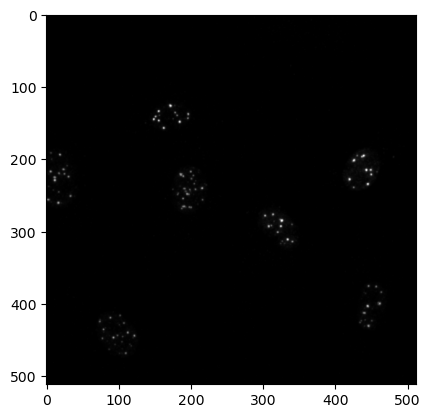

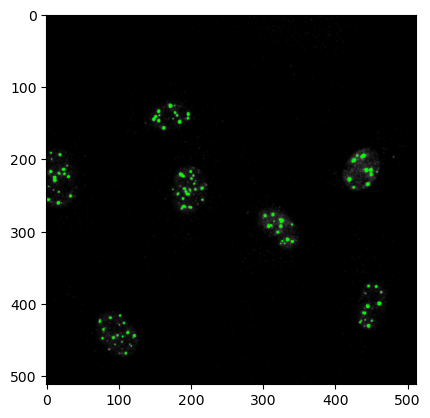

In [40]:
import torchvision.transforms as transforms
from PIL import Image
import matplotlib.pyplot as plt
import os
import numpy as np
import cv2 as cv
import re
image = cv.imread('/Users/pallavisingh/Library/CloudStorage/OneDrive-SharedLibraries-DalhousieUniversity/Priyadharshini Sridharan - Images from Dellaire Lab/merged-pml-images-No-arsenic/flattened_position_1_C1.tif')

new_image = np.zeros(image.shape, image.dtype)
## [basic-linear-transform-output]

alpha = 3.5
beta = 0

for y in range(image.shape[0]):
    for x in range(image.shape[1]):
        for c in range(image.shape[2]):
            new_image[y,x,c] = np.clip(alpha*image[y,x,c] + beta, 0, 255)


threshold = 110
gray_image = cv.cvtColor(new_image, cv.COLOR_BGR2GRAY)

# Create a mask for the white dots (any pixel above the threshold is considered a white dot)
mask = gray_image > threshold

# Set the corresponding pixels to bright red in the BGR image
new_image[mask] = [0, 255, 0]  # BGR for red: (0, 0, 255)


plt.imshow(image)
plt.show()
plt.imshow(new_image)
plt.show()

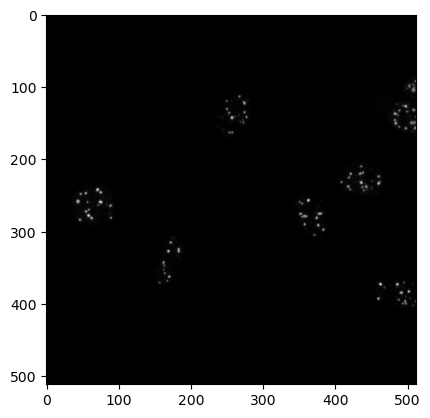

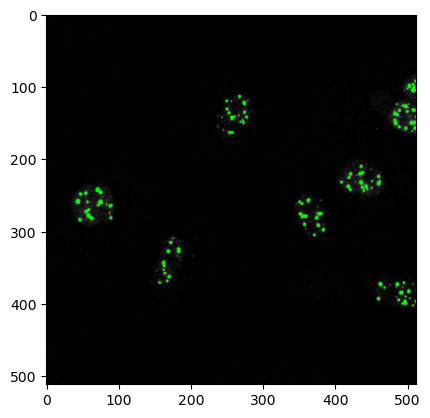

In [41]:
import torchvision.transforms as transforms
from PIL import Image
import matplotlib.pyplot as plt
import os
import numpy as np
import cv2 as cv
import re
image = cv.imread('/Users/pallavisingh/Library/CloudStorage/OneDrive-SharedLibraries-DalhousieUniversity/Priyadharshini Sridharan - Images from Dellaire Lab/test/flattened_position_1-1_C1.tif')

new_image = np.zeros(image.shape, image.dtype)
## [basic-linear-transform-output]

alpha = 3.5
beta = 0

for y in range(image.shape[0]):
    for x in range(image.shape[1]):
        for c in range(image.shape[2]):
            new_image[y,x,c] = np.clip(alpha*image[y,x,c] + beta, 0, 255)


threshold = 120
gray_image = cv.cvtColor(new_image, cv.COLOR_BGR2GRAY)

# Create a mask for the white dots (any pixel above the threshold is considered a white dot)
mask = gray_image > threshold

# Set the corresponding pixels to bright red in the BGR image
new_image[mask] = [0, 255, 0]  # BGR for red: (0, 0, 255)


plt.imshow(image)
plt.show()
plt.imshow(new_image)
plt.show()

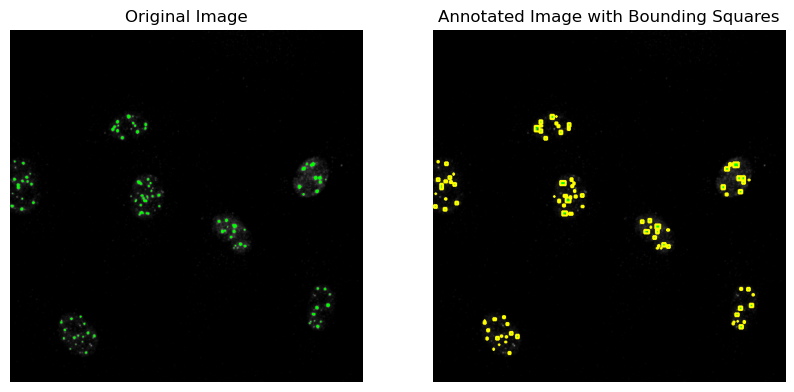

Total number of green pixels: 1037
Total number of detected dots (contours): 92


In [38]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image (ensure it's in RGB format)
image_rgb = cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB)

# Convert to HSV color space
hsv_image = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2HSV)

# Define range for green color in HSV
lower_green = np.array([40, 40, 40])   # Lower bound of green
upper_green = np.array([80, 255, 255]) # Upper bound of green

# Create a mask for green pixels
green_mask = cv2.inRange(hsv_image, lower_green, upper_green)

# Find contours of the green regions
contours, _ = cv2.findContours(green_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Annotate the green pixels in the original image
annotated_image = image_rgb.copy()

# Draw bounding squares around each detected contour
for contour in contours:
    x, y, w, h = cv2.boundingRect(contour)  # Get bounding rectangle
    cv2.rectangle(annotated_image, (x, y), (x + w, y + h), (255, 255, 0), 2)  # Draw rectangle

# Count the number of green pixels
green_pixel_count = cv2.countNonZero(green_mask)

# Display the original and annotated images
plt.figure(figsize=(10, 5))

# Show the original image
plt.subplot(1, 2, 1)
plt.imshow(image_rgb)
plt.title("Original Image")
plt.axis("off")

# Show the annotated image with bounding squares
plt.subplot(1, 2, 2)
plt.imshow(annotated_image)
plt.title("Annotated Image with Bounding Squares")
plt.axis("off")

plt.show()

# Print the total count of green pixels
print("Total number of green pixels:", green_pixel_count)
print("Total number of detected dots (contours):", len(contours))


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def detect_circular_dots(image_path, min_circularity=0.7, min_area=30, max_area=300):
    """
    Detect circular dots in grayscale image with shape analysis
    """
    # Read grayscale image
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if image is None:
        raise ValueError("Could not read image")
    
    # Store original
    original = image.copy()
    
    # Enhance contrast
    enhanced = cv2.normalize(image, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX)
    
    # Apply adaptive threshold
    binary = cv2.adaptiveThreshold(
        enhanced,
        255,
        cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
        cv2.THRESH_BINARY_INV,  # Inverse for white dots on black
        21,  # Block size
        5    # C constant
    )
    
    # Remove noise and smooth edges
    kernel = np.ones((3,3), np.uint8)
    cleaned = cv2.morphologyEx(binary, cv2.MORPH_OPEN, kernel, iterations=1)
    
    # Find contours
    contours, _ = cv2.findContours(
        cleaned,
        cv2.RETR_EXTERNAL,
        cv2.CHAIN_APPROX_SIMPLE
    )
    
    # Create RGB version for visualization
    annotated_image = cv2.cvtColor(original, cv2.COLOR_GRAY2RGB)
    
    dot_info = []
    valid_dots = []
    
    for i, contour in enumerate(contours):
        area = cv2.contourArea(contour)
        perimeter = cv2.arcLength(contour, True)
        
        # Skip if area is too small or too large
        if area < min_area or area > max_area:
            continue
            
        # Calculate circularity (1.0 means perfect circle)
        circularity = 4 * np.pi * area / (perimeter * perimeter) if perimeter > 0 else 0
        
        # Calculate additional shape metrics
        x, y, w, h = cv2.boundingRect(contour)
        aspect_ratio = float(w)/h if h > 0 else 0
        extent = float(area)/(w*h) if w*h > 0 else 0
        
        # Check if the dot is circular enough
        if circularity >= min_circularity and 0.8 <= aspect_ratio <= 1.2:
            valid_dots.append(contour)
            
            # Calculate intensity statistics for the dot
            mask = np.zeros_like(image, dtype=np.uint8)
            cv2.drawContours(mask, [contour], -1, 255, -1)
            dot_pixels = image[mask == 255]
            
            intensity_stats = {
                'mean': np.mean(dot_pixels),
                'std': np.std(dot_pixels),
                'min': np.min(dot_pixels),
                'max': np.max(dot_pixels)
            }
            
            # Store comprehensive dot information
            dot_info.append({
                'dot_id': len(dot_info) + 1,
                'center': (int(x + w/2), int(y + h/2)),
                'area': int(area),
                'perimeter': float(perimeter),
                'circularity': float(circularity),
                'aspect_ratio': float(aspect_ratio),
                'extent': float(extent),
                'width': w,
                'height': h,
                'intensity': intensity_stats
            })
            
            # Draw bounding box and ID
            cv2.rectangle(annotated_image, (x-2, y-2), (x+w+2, y+h+2), (0, 255, 0), 2)
            cv2.putText(annotated_image, str(len(dot_info)), (x, y-5),
                       cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 1)
    
    return original, annotated_image, dot_info, binary, cleaned

def analyze_dot_statistics(dot_info):
    """
    Analyze and print detailed statistics about detected dots
    """
    if not dot_info:
        print("No dots detected!")
        return
    
    # Extract key metrics
    areas = [dot['area'] for dot in dot_info]
    circularities = [dot['circularity'] for dot in dot_info]
    aspect_ratios = [dot['aspect_ratio'] for dot in dot_info]
    mean_intensities = [dot['intensity']['mean'] for dot in dot_info]
    
    print(f"\nDetected {len(dot_info)} dots\n")
    print("Shape Statistics:")
    print(f"Area (pixels) - Mean: {np.mean(areas):.1f}, Std: {np.std(areas):.1f}")
    print(f"                Min: {min(areas)}, Max: {max(areas)}")
    print(f"Circularity   - Mean: {np.mean(circularities):.3f}, Std: {np.std(circularities):.3f}")
    print(f"                Min: {min(circularities):.3f}, Max: {max(circularities):.3f}")
    print(f"Aspect Ratio  - Mean: {np.mean(aspect_ratios):.3f}, Std: {np.std(aspect_ratios):.3f}")
    
    print("\nIntensity Statistics:")
    print(f"Mean Intensity - Mean: {np.mean(mean_intensities):.1f}, Std: {np.std(mean_intensities):.1f}")
    print(f"                Min: {min(mean_intensities):.1f}, Max: {max(mean_intensities):.1f}")
    
    return {
        'areas': areas,
        'circularities': circularities,
        'aspect_ratios': aspect_ratios,
        'intensities': mean_intensities
    }

def plot_results(original, annotated, binary, cleaned, dot_info):
    """
    Plot results with additional analysis
    """
    fig = plt.figure(figsize=(20, 10))
    
    # Original and processed images
    plt.subplot(231)
    plt.imshow(original, cmap='gray')
    plt.title("Original Image")
    plt.axis("off")
    
    plt.subplot(232)
    plt.imshow(binary, cmap='gray')
    plt.title("Binary Threshold")
    plt.axis("off")
    
    plt.subplot(233)
    plt.imshow(cleaned, cmap='gray')
    plt.title("Cleaned Image")
    plt.axis("off")
    
    plt.subplot(234)
    plt.imshow(annotated)
    plt.title(f"Detected Dots: {len(dot_info)}")
    plt.axis("off")
    
    # Dot statistics plots
    if dot_info:
        plt.subplot(235)
        areas = [dot['area'] for dot in dot_info]
        plt.hist(areas, bins=20)
        plt.title("Area Distribution")
        plt.xlabel("Area (pixels)")
        
        plt.subplot(236)
        circularities = [dot['circularity'] for dot in dot_info]
        plt.hist(circularities, bins=20)
        plt.title("Circularity Distribution")
        plt.xlabel("Circularity (0-1)")
    
    plt.tight_layout()
    plt.show()

# Example usage
if __name__ == "__main__":
    image_path = '/Users/pallavisingh/Library/CloudStorage/OneDrive-SharedLibraries-DalhousieUniversity/Priyadharshini Sridharan - Images from Dellaire Lab/test/flattened_position_1-1_C1.tif'
    
    try:
        # Process image with stricter circularity requirements
        original, annotated, dot_info, binary, cleaned = detect_circular_dots(
            image_path,
            min_circularity=0.7,  # Minimum circularity (1.0 is perfect circle)
            min_area=30,          # Minimum dot area
            max_area=300          # Maximum dot area
        )
        
        # Plot results
        plot_results(original, annotated, binary, cleaned, dot_info)
        
        # Analyze and print statistics
        stats = analyze_dot_statistics(dot_info)
        
    except Exception as e:
        print(f"Error processing image: {str(e)}")